In [1]:
from statistics import correlation

#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
metro = pd.read_csv('data/Metro_Interstate_Traffic_Volume.csv')

In [3]:
metro.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,NaN,288.28,0.0,0.0,40,Clouds,scattered clouds,10/2/2012 9:00,5545
1,NaN,289.36,0.0,0.0,75,Clouds,broken clouds,10/2/2012 10:00,4516
2,NaN,289.58,0.0,0.0,90,Clouds,overcast clouds,10/2/2012 11:00,4767
3,NaN,290.13,0.0,0.0,90,Clouds,overcast clouds,10/2/2012 12:00,5026
4,NaN,291.14,0.0,0.0,75,Clouds,broken clouds,10/2/2012 13:00,4918


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              61 non-null     object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


In [4]:
#check data quality
def check_data(data):
    quality_dict = {
        'missing_values': data.isnull().sum().to_dict(),
        'duplicated_values': data.duplicated().sum(),
        'data.info': data.info(),
    }
    return quality_dict

In [5]:
report = check_data(metro)
display(report)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              61 non-null     object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


{'missing_values': {'holiday': 48143,
  'temp': 0,
  'rain_1h': 0,
  'snow_1h': 0,
  'clouds_all': 0,
  'weather_main': 0,
  'weather_description': 0,
  'date_time': 0,
  'traffic_volume': 0},
 'duplicated_values': np.int64(17),
 'data.info': None}

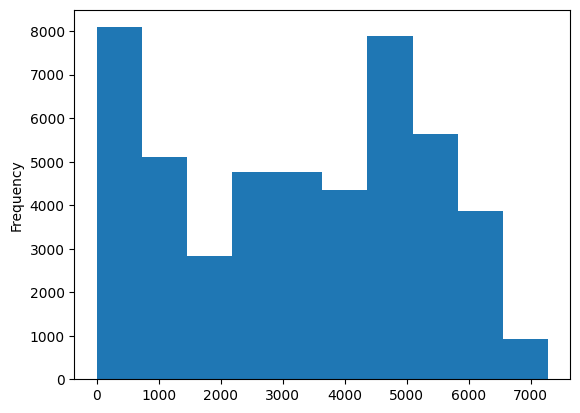

In [6]:
#analyse traffic volume
metro['traffic_volume'].plot.hist()
plt.show()

In [7]:
metro['traffic_volume'].describe()

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

In [8]:
#analyse day, evening and night
metro['date_time'] = pd.to_datetime(metro['date_time'])
metro['hour'] = metro['date_time'].dt.hour
day = metro.copy()[(metro['date_time'].dt.hour >= 8) & (metro['date_time'].dt.hour < 18)]
print(day.shape)
evening = metro.copy()[(metro['date_time'].dt.hour >= 18) & (metro['date_time'].dt.hour < 24)]
print(evening.shape)
night = metro.copy()[(metro['date_time'].dt.hour >= 0) & (metro['date_time'].dt.hour < 8)]
print(night.shape)

(19812, 10)
(11942, 10)
(16450, 10)


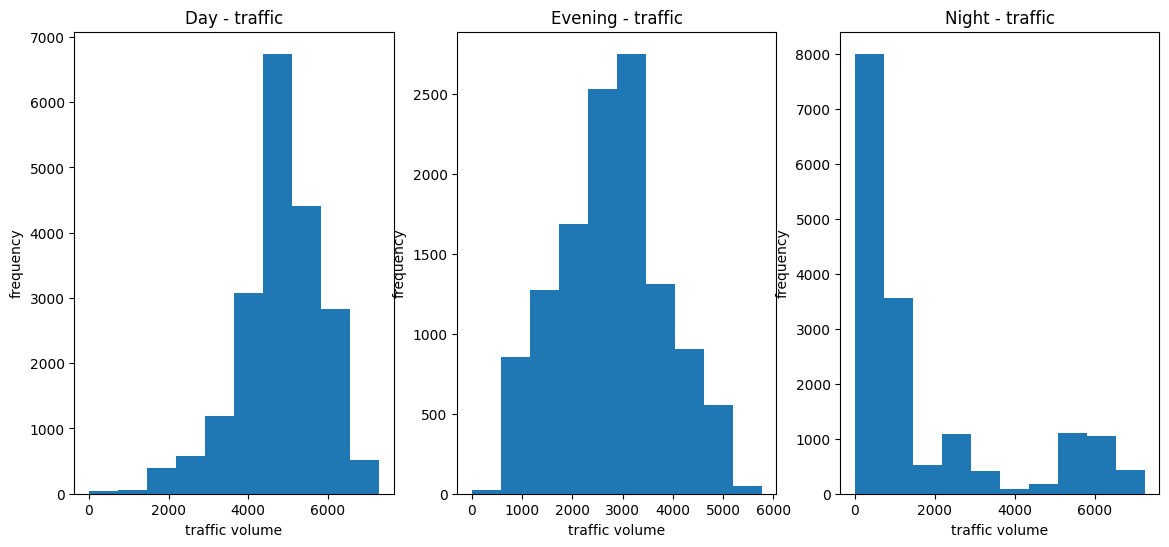

In [9]:
fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (14,6))
#day
axes[0].hist(day['traffic_volume'])
axes[0].set_xlabel('traffic volume')
axes[0].set_ylabel('frequency')
axes[0].set_title('Day - traffic')
#evening
axes[1].hist(evening['traffic_volume'])
axes[1].set_xlabel('traffic volume')
axes[1].set_ylabel('frequency')
axes[1].set_title('Evening - traffic')
#night
axes[2].hist(night['traffic_volume'])
axes[2].set_xlabel('traffic volume')
axes[2].set_ylabel('frequency')
axes[2].set_title('Night - traffic')
plt.show()

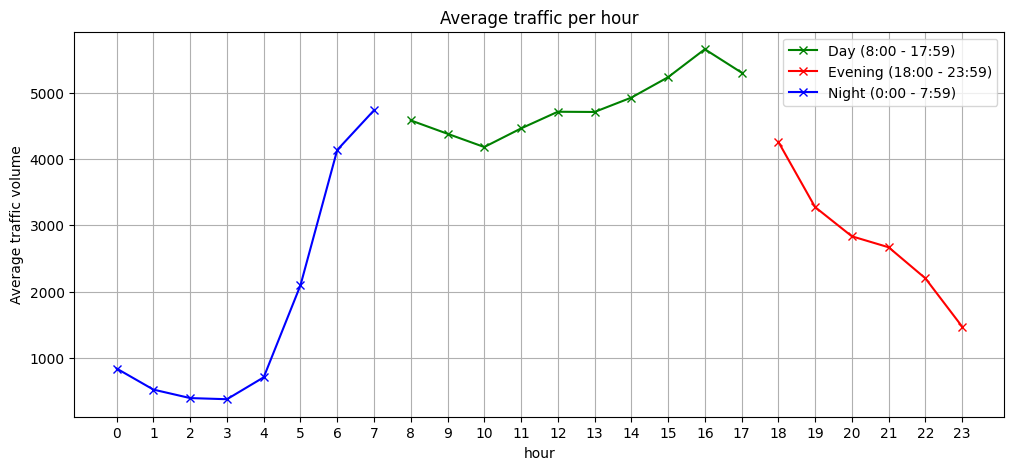

In [10]:
#average traffic per hour
avg_traffic_per_hour = metro.groupby('hour')['traffic_volume'].mean()
day_interval = avg_traffic_per_hour.loc[8:17]
evening_interval = avg_traffic_per_hour.loc[18:23]
night_interval = avg_traffic_per_hour.loc[0:7]
#line chart
fig, ax = plt.subplots(figsize = (12, 5))
fig.patch.set_facecolor('white')
fig.set_facecolor('white')
ax.tick_params(colors='black') ## mãi chưa chỉnh đc màu cho đúng ý huhu
ax.plot(day_interval.index, day_interval.values, color = 'green',
         label = 'Day (8:00 - 17:59)', marker = 'x')
ax.plot(evening_interval.index, evening_interval.values, color = 'red',
         label = 'Evening (18:00 - 23:59)', marker = 'x')
ax.plot(night_interval.index, night_interval.values, color = 'blue',
         label = 'Night (0:00 - 7:59)', marker = 'x')

ax.set_title('Average traffic per hour')
ax.set_xlabel('hour')
ax.set_ylabel('Average traffic volume')
ax.legend(prop = {'size': 10})
ax.grid()
ax.set_xticks(range(0, 24))
plt.show()

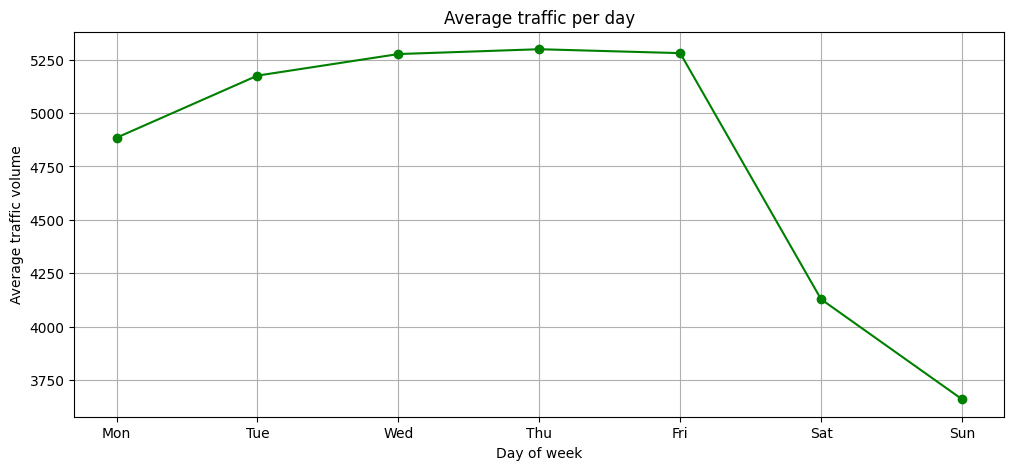

In [36]:
#avr per day (8 - 17:59)
day['day_of_week'] = day['date_time'].dt.dayofweek
avg_dayofweek = day.groupby('day_of_week')['traffic_volume'].mean()
fig, ax = plt.subplots(figsize = (12, 5))
ax.plot(avg_dayofweek.index, avg_dayofweek.values, color = 'green', marker = 'o')
ax.set_title('Average traffic per day')
ax.set_xlabel('Day of week')
ax.set_ylabel('Average traffic volume')
ax.set_xticks(range(0, 7), labels = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
ax.grid()
plt.show()

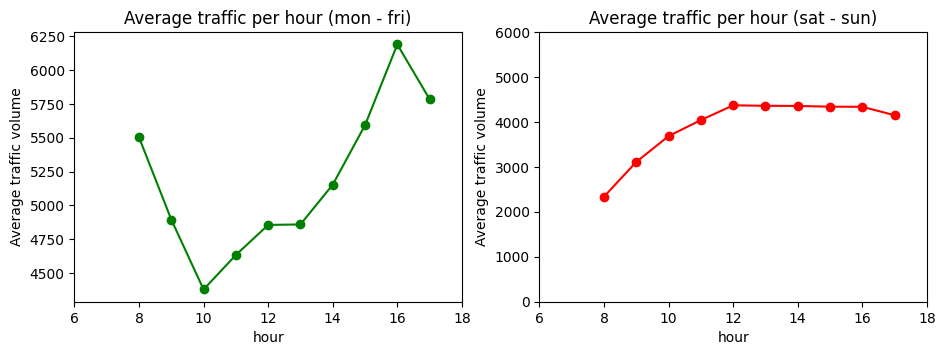

In [37]:
#by day(8 - 17:59)
weekday = day.copy()[day['day_of_week'] <= 4] ## friday
weekend = day.copy()[day['day_of_week'] > 4]
by_hour_weekday = weekday.groupby('hour')['traffic_volume'].mean()
by_hour_weekend = weekend.groupby('hour')['traffic_volume'].mean()
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (11, 3.5))
ax[0].plot(by_hour_weekday.index, by_hour_weekday.values, color = 'green', marker = 'o')
ax[0].set_xlim([6,18])
ax[1].set_ylim([0, 6000])
ax[0].set_title('Average traffic per hour (mon - fri)')
ax[0].set_xlabel('hour')
ax[0].set_ylabel('Average traffic volume')

ax[1].plot(by_hour_weekend.index, by_hour_weekend.values, color = 'red', marker = 'o')
ax[1].set_title('Average traffic per hour (sat - sun)')
ax[1].set_xlabel('hour')
ax[1].set_ylim([0, 6000])
ax[1].set_ylabel('Average traffic volume')
ax[1].set_xlim([6,18])
plt.show()

In [28]:
#strongest corr with traffic vol
correlation = metro.corr(numeric_only = True)['traffic_volume']
correlation = correlation.drop(['traffic_volume', 'hour']).sort_values(ascending = False)
display(correlation)
print(f"The strongest correlation with traffic volume is {correlation.idxmax()}")

temp           0.130299
clouds_all     0.067054
rain_1h        0.004714
snow_1h        0.000733
day_of_week   -0.149544
Name: traffic_volume, dtype: float64

The strongest correlation with traffic volume is temp


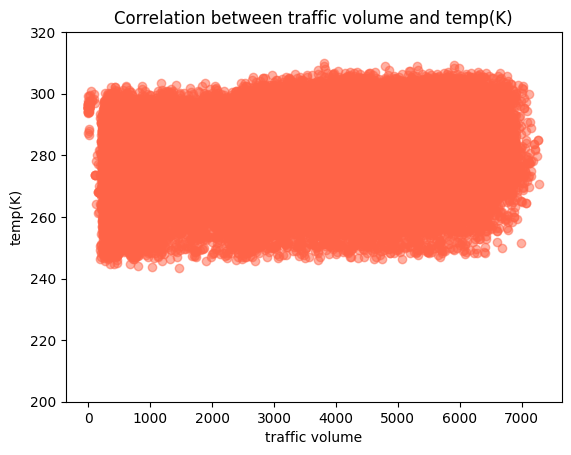

In [35]:
plt.scatter(metro['traffic_volume'], metro['temp'], color = 'tomato', alpha = .5)
plt.xlabel('traffic volume')
plt.ylabel('temp(K)')
plt.title('Correlation between traffic volume and temp(K)')
plt.ylim([200,320])
plt.show()

In [63]:
#weather
weather_summary = day.groupby('weather_main')['traffic_volume'].agg(['count', 'mean']).sort_values(by='count', ascending=False).reset_index() #mean traffic vol theo weather main
weather_name = weather_summary['weather_main'].unique()
weather_freq = weather_summary['count']
weather_avg = weather_summary['mean']
display(weather_summary)

,weather_main,count,mean
0,Clouds,7366,4924.390035
1,Clear,4777,4836.217501
2,Rain,2344,4874.104096
3,Mist,2028,4637.190335
4,Snow,1220,4440.937705
5,Haze,743,4639.445491
6,Drizzle,721,4889.798890
7,Thunderstorm,347,4719.008646
8,Fog,255,4295.694118
9,Smoke,10,4832.900000


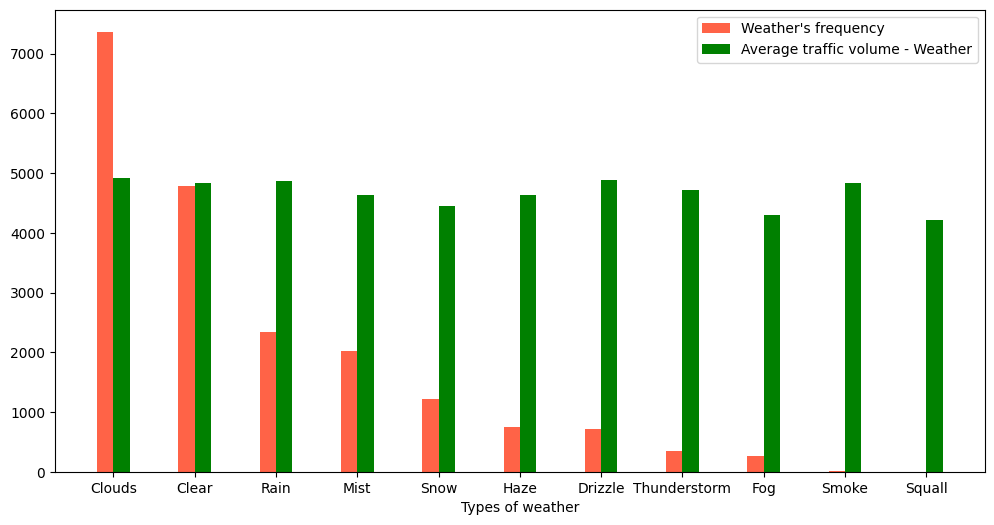

In [61]:
weather_index = np.arange(len(weather_summary))
width = 0.2
plt.figure(figsize=(12, 6))
plt.bar(weather_index, weather_freq, width, color = 'tomato', label = "Weather's frequency")
plt.bar(weather_index + width, weather_avg, width, color = 'green', label = 'Average traffic volume - Weather')
plt.legend()
plt.xticks(weather_index + width / 2, weather_name)
plt.xlabel('Types of weather')

plt.show()

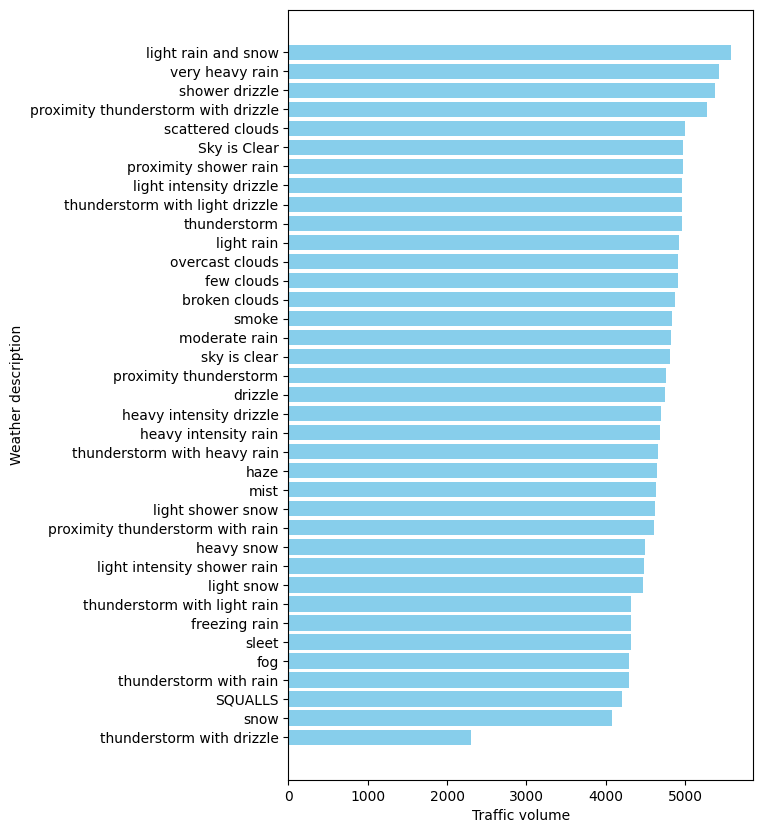

In [77]:
#weather description
plt.figure(figsize=(6, 10))
weather_des_and_traffic = day.groupby('weather_description')['traffic_volume'].mean().sort_values(ascending = True)
plt.barh(weather_des_and_traffic.index, weather_des_and_traffic.values, color = 'Skyblue')
plt.xlabel('Traffic volume')
plt.ylabel('Weather description')
plt.show()